# 1. 线性可分SVM

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

## 1.1 生成模拟数据

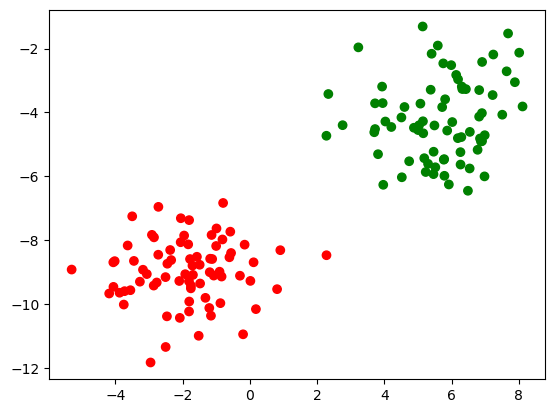

In [8]:
# 导入sklearn模拟二分类数据生成模块
from sklearn.datasets import make_blobs
# 生成模拟二分类数据集
X, y =  make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.2, random_state=40)
# 设置颜色参数
colors = {0:'r', 1:'g'}
# 绘制二分类数据集的散点图
plt.scatter(X[:,0], X[:,1], marker='o', c=pd.Series(y).map(colors))
plt.show();

In [6]:
# 将标签转换为1/-1
y_ = y.copy()
y_[y_==0] = -1
y_ = y_.astype(float)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.3, random_state=43)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(105, 2) (105,) (45, 2) (45,)


## 1.2 线性可分支持向量机

In [9]:
# 导入sklearn线性SVM分类模块
from sklearn.svm import LinearSVC
# 创建模型实例
clf = LinearSVC(random_state=0, tol=1e-5)
# 训练
clf.fit(X_train, y_train)
# 预测
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
# 计算测试集准确率
print(accuracy_score(y_test, y_pred))

1.0


In [11]:
from matplotlib.colors import ListedColormap

### 绘制线性可分支持向量机决策边界图
def plot_classifer(model, X, y):
    # 超参数边界
    x_min = -7
    x_max = 12
    y_min = -12
    y_max = -1
    step = 0.05
    # meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    # 模型预测
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # 定义color map
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#003300'])
    z = z.reshape(xx.shape)

    plt.figure(figsize=(8, 5), dpi=96)
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.show()

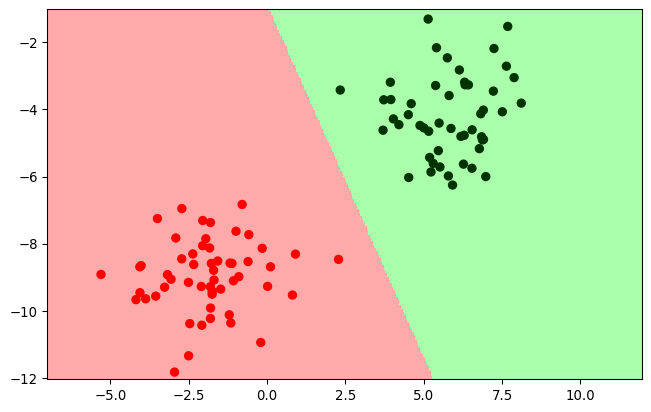

In [12]:
plot_classifer(clf, X_train, y_train)

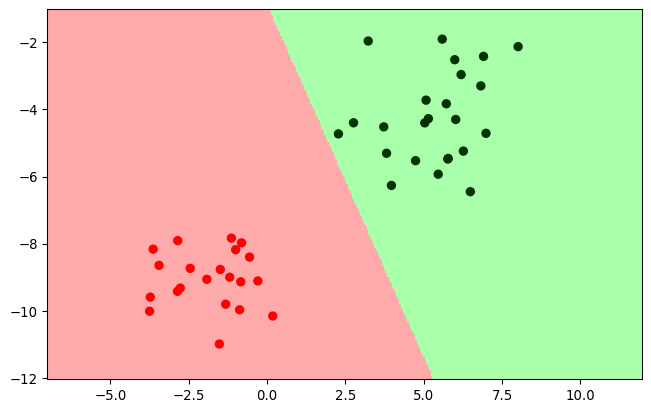

In [13]:
plot_classifer(clf, X_test, y_test)